# Plotting a few things for thesis
This and that, maps and such!

In [1]:
# Some quick setup of the ipynb file
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# mtpltlib setup
plt.rc('figure.subplot', wspace=.65)
plt.rc('grid', linewidth=1)
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

%load_ext autoreload
%autoreload 2
%pdb 1

Automatic pdb calling has been turned ON


In [2]:
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 20

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Helvetica"

In [ ]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import seaborn as sns

## Southeast Australia plot


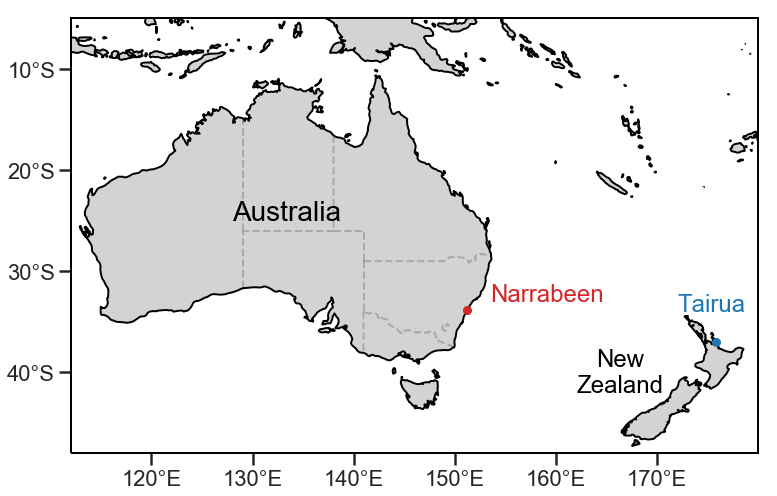

In [47]:
fig = plt.figure(figsize=(16,8)) #

#map info
zone = 56
#mapinfo = ccrs.UTM(zone, southern_hemisphere=True)
mapinfo = ccrs.PlateCarree()


#get states
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='none')

#Australia
extents1 = (112, 180, -48, -5)
xticks1 = np.arange(np.ceil(extents1[0]/10)*10,extents1[1],10)
yticks1 = np.arange(np.ceil(extents1[2]/10)*10,extents1[3],10)
ax1 = plt.axes(projection=mapinfo)
ax1.set_extent(extents1, mapinfo)
ax1.set_xticks(xticks1, crs=mapinfo)
ax1.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax1.set_yticks(yticks1, crs=mapinfo)
ax1.yaxis.set_major_formatter(LATITUDE_FORMATTER)
ax1.add_feature(land, facecolor='lightGray')
ax1.add_feature(states_provinces, edgecolor='gray', linestyle='--', alpha=0.5)
ax1.coastlines(resolution='50m', color='black')

sns.set_context("poster")
#sns.set(font_scale=1.8)
sns.set_style("ticks")

ax1.plot(151.214302,-33.851326,'o',color='C3',markersize='8',transform=mapinfo)
ax1.plot(175.858220,-36.991178,'o',color='C0',markersize='8',transform=mapinfo)

ax1.text(172,-34,'Tairua',color='C0',transform=mapinfo)
ax1.text(153.5,-33,'Narrabeen',color='C3',transform=mapinfo)

ax1.text(128,-25,'Australia',color='k',transform=mapinfo,fontsize=28)
ax1.text(162,-42,'New\nZealand',color='k',transform=mapinfo, multialignment='center')

if True:
    preextpath = os.path.join('..','figures','location','transtasman_map')
    os.makedirs(os.path.dirname(preextpath), exist_ok=True)
    plt.savefig(preextpath + '.png', bbox_inches='tight', dpi=500)
    plt.savefig(preextpath + '.pdf', bbox_inches='tight', dpi=500)
    
plt.show()
    